In [1]:
import numpy as np
import matplotlib.pyplot as plt

from model import OpinionModel
import networkx as nx

SEED = 77
np.random.seed(SEED)

In [38]:
nodes_number = 200

G = nx.barabasi_albert_graph(nodes_number, m=1, seed=SEED)

om = OpinionModel(G=G)


#plt.hist(x0, 100, color = "k")
#plt.savefig("res-hist-before.png", format="PNG")

In [43]:
x0 = np.random.uniform(low=-1.0, high=1.0, size=nodes_number)
res = om.model(alpha=0.2, T=500, x0=x0)

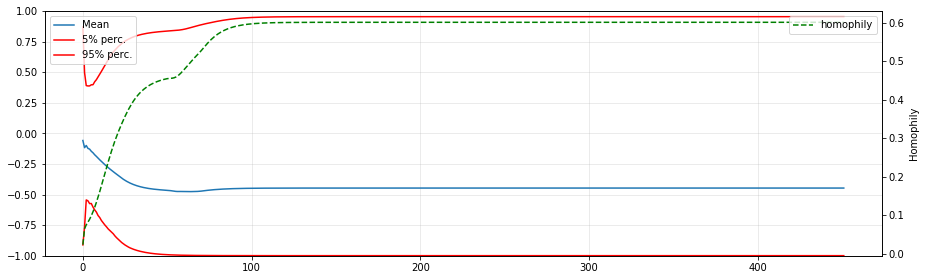

In [44]:
om.plot_results(res, show=True)
# plt.savefig("res-developAB3065.png", format="PNG")

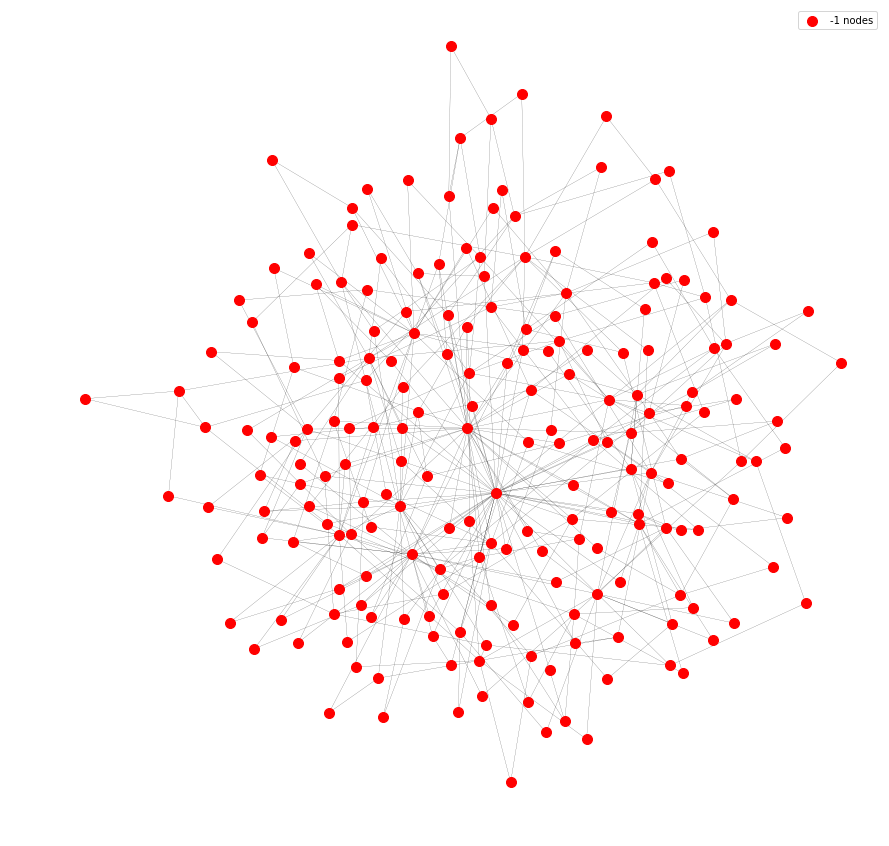

In [251]:
time_moment = -1  # posledni chvile
om.plot_graph(x=res[time_moment, :, 0], show = True)
#plt.savefig("netAB3065.png", format="PNG")

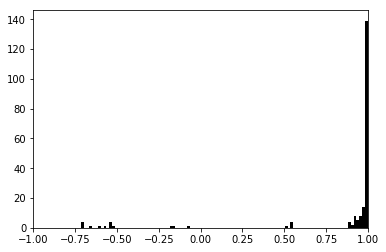

In [123]:
plt.hist(res[time_moment, :, 0], 100, color = "k"); plt.xlim((-1, 1));
#plt.savefig("res-hist-after.png", format="PNG") 

###### Poznamky:
- U BA(m=5) site pri zmenach parametru alpha --> cim mensi alpha, tim drive nastava bifurkace, pro vysoke v rozumnych casech ani nenastane: alpha=0.6 vs. alpha=0.7.

In [2]:
nodes_number = 1000
G = nx.barabasi_albert_graph(nodes_number, m=3, seed=SEED)

results = np.zeros(shape=[50, 50])  # ruzne x0, ruzne alphy
variance = np.zeros(shape=[50, 50])  # ruzne x0, ruzne alphy

om = OpinionModel(G=G)

alphas = np.linspace(0, 1, results.shape[1])
for i, _ in enumerate(range(results.shape[0])):
    x0 = np.random.uniform(low=-1.0, high= 1.0, size=nodes_number)

    for j, a in enumerate(alphas):
        res = om.model(alpha=a, T=500, x0=x0)
        results[i, j] = res[-1, :, 0].mean()
        variance[i, j] = res[-1, :, 0].std()
        
# np.savetxt("results1000n3.txt", results)
# np.savetxt("variance1000n3.txt", variance)

In [4]:
# res[-1, :, 0].std()

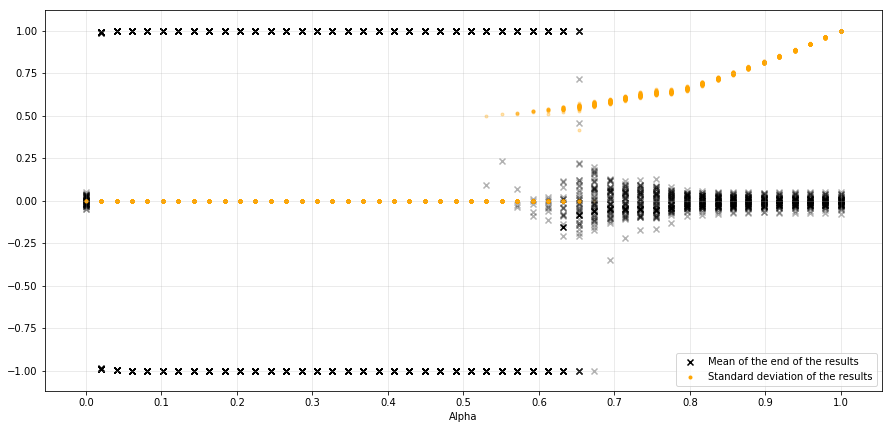

In [3]:
plt.figure(figsize=(15, 7))
for i in range(results.shape[0]):
    plt.scatter(alphas, results[i, :], color='k', alpha=0.3, marker='x')
    plt.scatter(alphas, variance[i,:], marker=".", alpha=0.3, c="orange")

#, label='Standard deviation of the results'
#label='Standard deviation of the results'
plt.scatter(alphas, results[0, :], color='k', alpha=1.0, marker='x', label ='Mean of the end of the results')
plt.scatter(alphas, variance[0,:], marker=".", alpha=1.0, c='orange', label='Standard deviation of the results')

plt.xlabel('Alpha')
#plt.ylabel('Mean of the end of the result')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(alpha=0.3)

# plt.savefig("n1000,n3+v.png", dpi=500)
plt.show()